In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import numpy.linalg as nplin
import scipy.linalg as scilin
import sympy as sy
from scipy import linalg
import matplotlib.pyplot as plt
from scipy import linalg
import copy
import math
import frame_two_node as fr_tw
from frame_two_node import Frame
import time

%load_ext autoreload
%autoreload 2



In [2]:
'''
nodes = {1: (0, 0), 2: (0, 2), 3: (1, 3), 4: (2, 4), 5: (4, 4), 6: (4, 0)}
elems = {1: (1, 2), 2: (2, 3), 3: (3, 4), 4: (4, 5), 5: (5, 6)}
gl = {}
gl_fixed = {1: 0, 2: 0, 17: 0}
px_pred = {2: 1000}
qx_pred = {}
py_pred = {4: -1000}
qy_pred = {2: -1000, 3: -1000, 4: -1000}
m_pred = {}

I = {key: 0.36/100 for (key, value) in elems.items()}

E = {key: 210 * 10 ** 9 for (key, value) in elems.items()}

A = {key: 0.2*0.6 for (key, value) in elems.items()}
'''






'\nnodes = {1: (0, 0), 2: (0, 2), 3: (1, 3), 4: (2, 4), 5: (4, 4), 6: (4, 0)}\nelems = {1: (1, 2), 2: (2, 3), 3: (3, 4), 4: (4, 5), 5: (5, 6)}\ngl = {}\ngl_fixed = {1: 0, 2: 0, 17: 0}\npx_pred = {2: 1000}\nqx_pred = {}\npy_pred = {4: -1000}\nqy_pred = {2: -1000, 3: -1000, 4: -1000}\nm_pred = {}\n\nI = {key: 0.36/100 for (key, value) in elems.items()}\n\nE = {key: 210 * 10 ** 9 for (key, value) in elems.items()}\n\nA = {key: 0.2*0.6 for (key, value) in elems.items()}\n'

In [3]:
# General resolution
beam_type = input("Você deseja a análise elástica de 'timo' ou 'euler'?")

nodes, elems, gl_fixed, px_pred, qx_pred, py_pred, qy_pred, m_pred, I, E, A, v, beam_type = fr_tw.read_frame(b_type=beam_type)

frame_one = Frame(nodes, elems, gl_fixed, px_pred, qx_pred, py_pred, qy_pred,
                  m_pred, I, E, A, v, beam_type)

print(beam_type)

elem = 3
# print(f'Graus de liberdade do pórtico: {frame_one.gl}')
# print(f'Comprimento do elemento {elem}: {frame_one.points(elem)[2]}')
# print(f'Coseno x e y do elemento {elem}:', f'({frame_one.cos_dir(elem)[0]}, {frame_one.cos_dir(elem)[1]})')

# print(f'Matriz local do elemento {elem}: {frame_one.k_loc(elem)}')

#print(f'Força equivalente total (kN): {frame_one.f_equiv()[0]}')
# print(f'Força equivalente distribuida (kN): {frame_one.f_equiv()[2]["F. Dist. (kN/m)"]}')
# print(f'Força concentrada (kN): {frame_one.f_equiv()[2]["F. CC (kN)"]}')

print(f'Resultados de deslocamentos u: {frame_one.solver()}')

pontos = 2
#print(f'Resultados de normal:\n {frame_one.post_proc(pontos)[0]}', '\n')
#print(f'Resultados de fletor:\n {frame_one.post_proc(pontos)[1]}', '\n')
#print(f'Resultados de cortante:\n {frame_one.post_proc(pontos)[2]}')

#frame_one.results_view()


time1 = time.perf_counter()
frame_one.post_proc(2)
time2 = time.perf_counter()

print(f'Cálculo de deslocamento e esforços (com aproximação de {pontos} pontos/elemento) demorou: {10**3*(time2-time1)} ms')

#print(frame_one.k_glob()[0])

#K = frame_one.k_glob()[0]
#G = nplin.inv(K)
#print(G)
frame_one.results_view()

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

Você deseja a análise elástica de 'timo' ou 'euler'? timo


timo
Resultados de deslocamentos u: (array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00513553, -0.00046189, -0.00282714,  0.00513327,
       -0.00070477, -0.002795  ,  0.01252246, -0.00099281, -0.00221537,
        0.01237795, -0.00134052, -0.00214743]), array([-9.93570057e+04,  5.54272642e+05,  1.44591242e+05, -1.00642994e+05,
        8.45727358e+05,  1.45363006e+05,  1.39698386e-09,  1.52795110e-10,
        2.18278728e-11, -4.65661287e-10, -7.27595761e-12,  9.45874490e-11,
       -3.72529030e-09,  2.32830644e-10, -5.09317033e-11,  1.86264515e-09,
       -1.16415322e-10,  2.54658516e-11]))
Cálculo de deslocamento e esforços (com aproximação de 2 pontos/elemento) demorou: 15.17750000130036 ms
Resolução do pórtico - Exemplo

NÚMERO DE NÓS: 6
NÚMERO DE ELEMENTOS: 6

COORDENADAS DOS NÓS 

       X    Y
NÓ           
1.0  0.0  0.0
2.0  3.5  0.0
3.0  0.0  2.0
4.0  3.5  2.0
5.0  0.0  4.0
6.0  3.5  4.0 

      NÓ_1  NÓ_2             E     A       

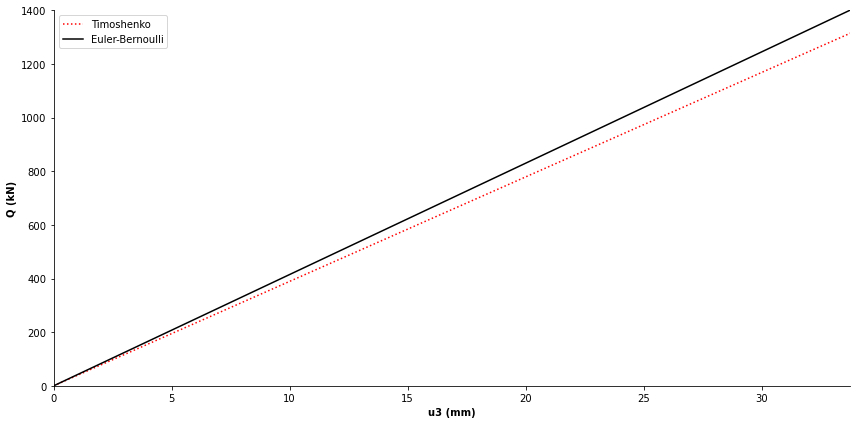

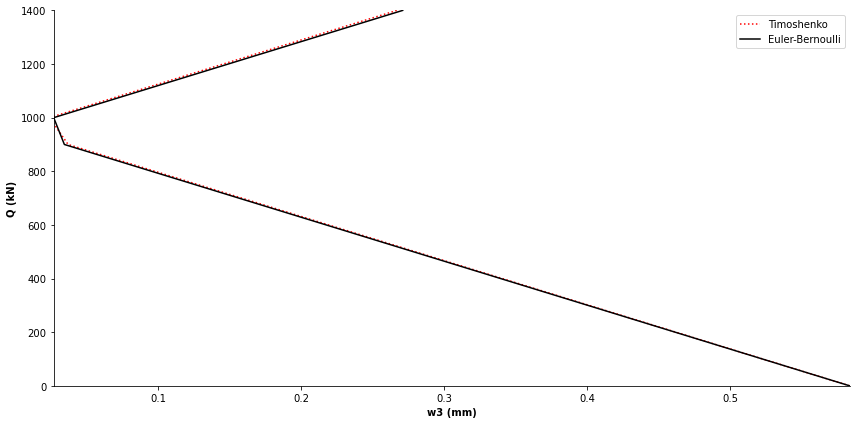

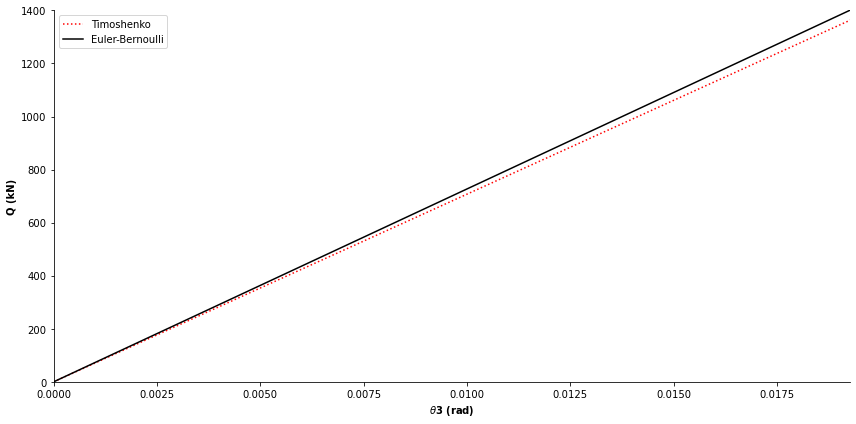

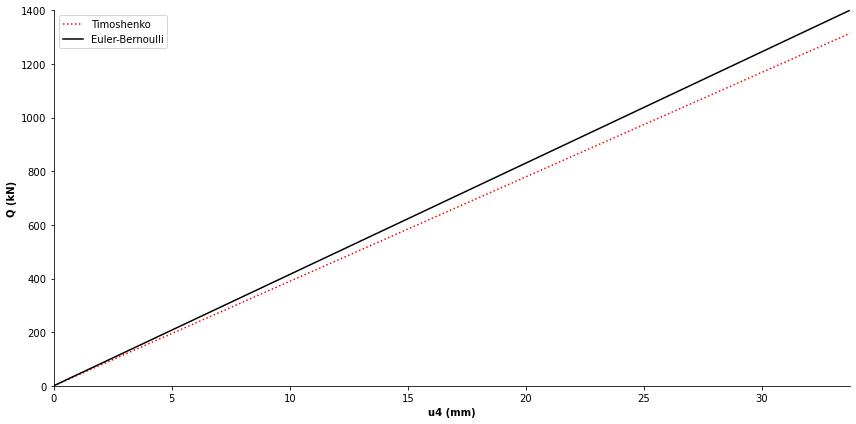

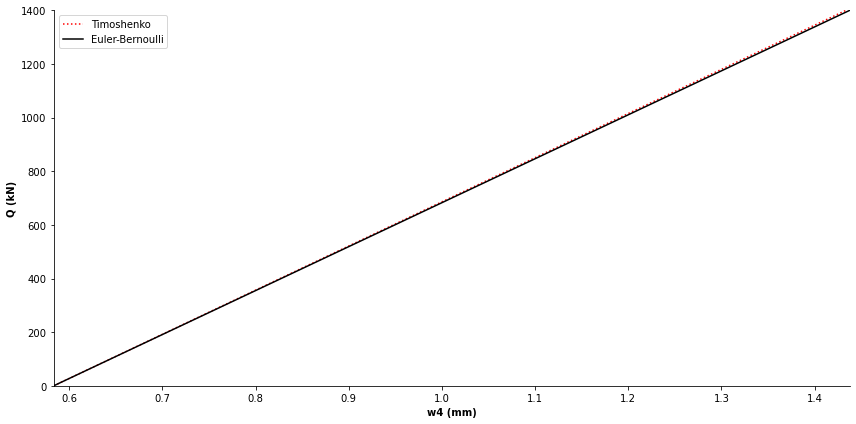

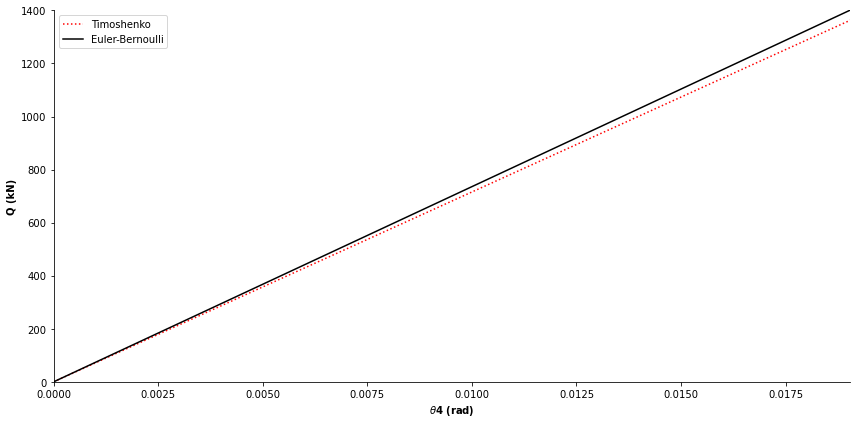

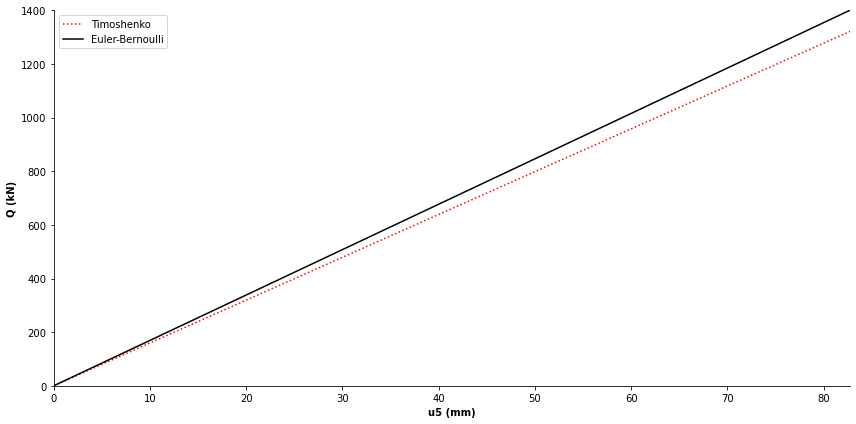

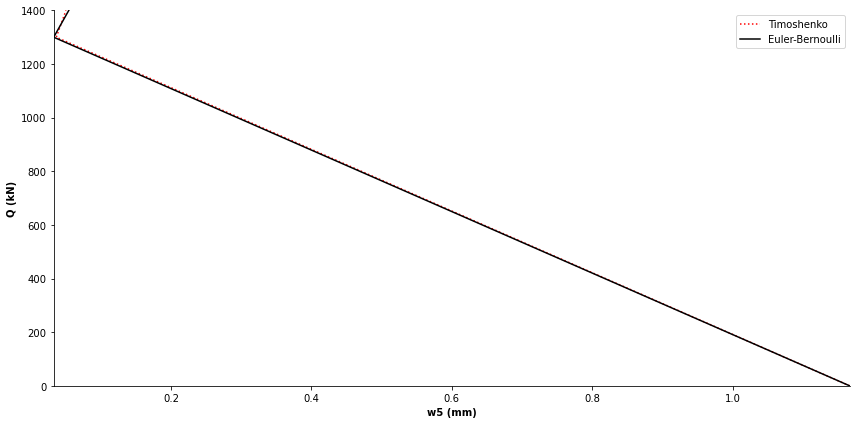

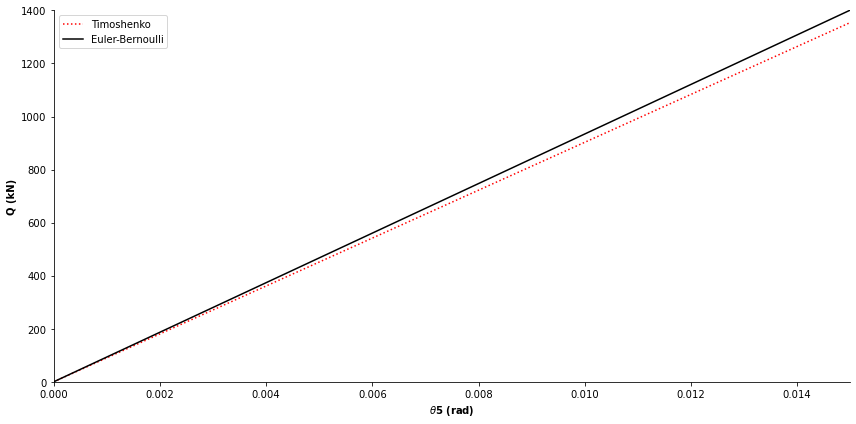

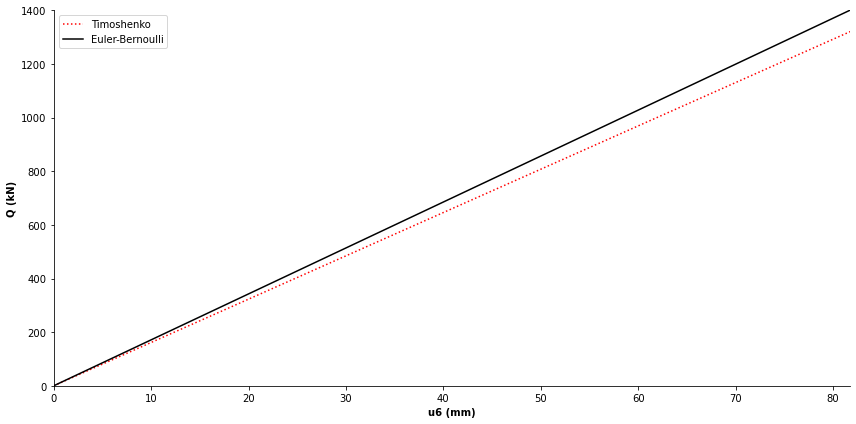

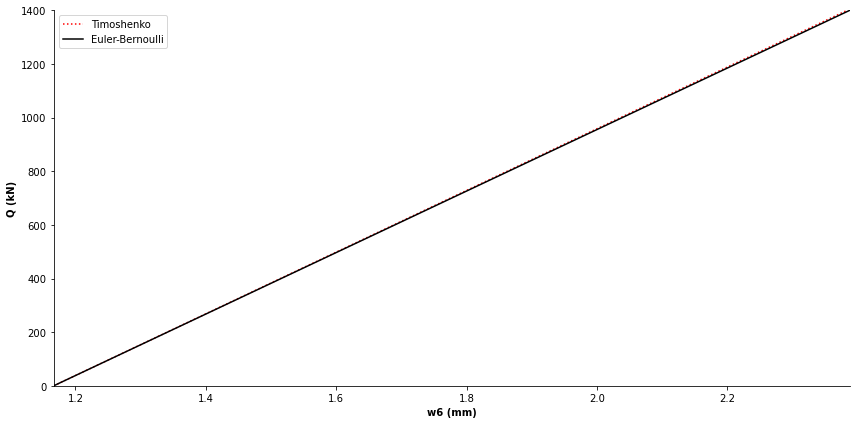

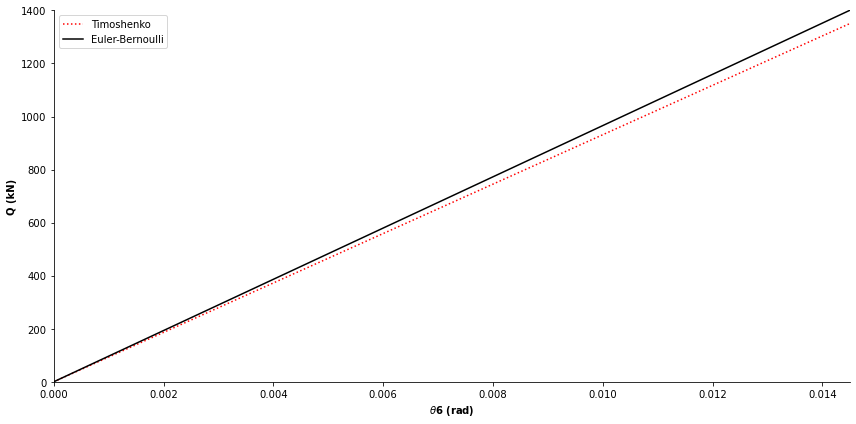

In [ ]:
# Exemplo 1

beam_type = input("Você deseja a análise elástica de 'timo' ou 'euler'?")

nodes, elems, gl_fixed, px_pred, qx_pred, py_pred, qy_pred, m_pred, I, E, A, v, beam_type = fr_tw.read_frame(b_type=beam_type)

frame_one = Frame(nodes, elems, gl_fixed, px_pred, qx_pred, py_pred, qy_pred,
                  m_pred, I, E, A, v, beam_type)

print(beam_type)

elem = 3
# print(f'Graus de liberdade do pórtico: {frame_one.gl}')
# print(f'Comprimento do elemento {elem}: {frame_one.points(elem)[2]}')
# print(f'Coseno x e y do elemento {elem}:', f'({frame_one.cos_dir(elem)[0]}, {frame_one.cos_dir(elem)[1]})')

# print(f'Matriz local do elemento {elem}: {frame_one.k_loc(elem)}')

#print(f'Força equivalente total (kN): {frame_one.f_equiv()[0]}')
# print(f'Força equivalente distribuida (kN): {frame_one.f_equiv()[2]["F. Dist. (kN/m)"]}')
# print(f'Força concentrada (kN): {frame_one.f_equiv()[2]["F. CC (kN)"]}')

print(f'Resultados de deslocamentos u: {frame_one.solver()}')

pontos = 2
#print(f'Resultados de normal:\n {frame_one.post_proc(pontos)[0]}', '\n')
#print(f'Resultados de fletor:\n {frame_one.post_proc(pontos)[1]}', '\n')
#print(f'Resultados de cortante:\n {frame_one.post_proc(pontos)[2]}')

#frame_one.results_view()


time1 = time.perf_counter()
frame_one.post_proc(2)
time2 = time.perf_counter()

print(f'Cálculo de deslocamento e esforços (com aproximação de {pontos} pontos/elemento) demorou: {10**3*(time2-time1)} ms')

#print(frame_one.k_glob()[0])

#K = frame_one.k_glob()[0]
#G = nplin.inv(K)
#print(G)
frame_one.results_view()

def plot_results(node, comp, absolute=True):
    pos = (node-1)*3 + (comp-1)
    string = ""
    string_ = ""
    node = str(node)
    if comp == 1:
        string = f"u{node} (mm)"
        string_ = f"u{node} (mm)"
    elif comp == 2:
        string = f"w{node} (mm)"
        string_ = f"w{node} (mm)"
    elif comp == 3:
        string = r'$\theta$'+str(node)+" (rad)"
        string_ = f"theta{node} (rad)"
        
    u_vals = []
    P_vals = []
    frame_one.beam_type = "timo"
    for i in range(0, 1400*1000+10000, 100000):
        frame_one.px[5] = i
        u = frame_one.solver()[0][pos]
        if comp!=3:
            if absolute:
                u_vals.append(abs(u*1000))
            else:
                u_vals.append(u*1000)
        else:
            if absolute:
                u_vals.append(abs(u))
            else:
                u_vals.append(u)            
        P_vals.append(int(i)/1000)

    fig, ax = plt.subplots()
    ax.plot(u_vals, P_vals, linestyle="dotted", label="Timoshenko", color="red")

    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_ylabel("Q (kN)", fontdict=dict(weight='bold'))
    ax.set_xlabel(string, fontdict=dict(weight='bold'))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')


    u_vals = []
    P_vals = []
    frame_one.beam_type = "euler"
    for i in range(0, 1400*1000+10000, 100000): # De 100kN a 1400 kN (com passos de 100kN)
        frame_one.px[5] = i
        u = frame_one.solver()[0][pos]
        if comp!=3:
            if absolute:
                u_vals.append(abs(u*1000))
            else:
                u_vals.append(u*1000)
        else:
            if absolute:
                u_vals.append(abs(u))
            else:
                u_vals.append(u)
        P_vals.append(int(i)/1000)

    ax.plot(u_vals, P_vals, label="Euler-Bernoulli",  color="black")
    ax.legend()
    ax.set_ylim(0, max(P_vals))
    ax.set_xlim(min(u_vals), max(u_vals))
    fig.tight_layout()
    fig.savefig(f"./figs/{string_}.jpg", dpi=200, bbox_inches="tight")
    plt.show()
    plt.close()
    

for i in range(3, 7):
    for j in range(1, 4):
        plt.rcParams["figure.figsize"] = (12,6)
        plot_results(i, j)
        #plot_results(i, j, False)



